In [1]:
# imports, run before any other cell
import pandas as pd
import matplotlib.pyplot as plt
import json
from matplotlib.ticker import FuncFormatter

In [25]:
# Load the CSV file
csv_path = r"C:\Users\Alex\Downloads\run-average_episode_rewards_average_episode_rewards-tag-average_episode_rewards.csv"
df_avg_rewards = pd.read_csv(csv_path)

df_avg_rewards.drop(columns=['Wall time'], inplace=True)

# Display the last few rows to verify
print(df_avg_rewards.tail())

          Step     Value
1384  19931040 -8.193749
1385  19945440 -7.985416
1386  19959840 -5.789583
1387  19974240 -7.889583
1388  19988640 -5.379166


In [26]:
# Load the CSV file
csv_path = r"C:\Users\Alex\Downloads\run-eval_average_episode_rewards_eval_average_episode_rewards-tag-eval_average_episode_rewards.csv"
df_eval_avg_rewards = pd.read_csv(csv_path)

df_eval_avg_rewards.drop(columns=['Wall time'], inplace=True)

# Display the last few rows to verify
print(df_eval_avg_rewards.tail())

          Step      Value
1384  19931040 -12.049999
1385  19945440  -6.900000
1386  19959840  -5.200000
1387  19974240  -4.650000
1388  19988640  -4.200000


In [27]:
# Load the CSV file
csv_path = r"C:\Users\Alex\Desktop\Thesis_Results_Cleaned_Up_CSV_files\4_confidentiality_small_with_block_limit_analyse.csv"
df_faizan_confidentiality_small = pd.read_csv(csv_path)

df_faizan_confidentiality_small.drop(df_faizan_confidentiality_small.columns[0], axis=1, inplace=True)

df_faizan_confidentiality_small['Train_Step'] = df_faizan_confidentiality_small['Train_Episode'] * 64 * 30

# Smooth the data by grouping into 1000 bins and taking the mean
df_faizan_confidentiality_small = (
    df_faizan_confidentiality_small
    .groupby(
        pd.cut(
            df_faizan_confidentiality_small.index,
            bins=1389,
            labels=False
        )
    )
    .mean(numeric_only=True)
    .reset_index(drop=True)
)

# Display the last few rows to verify
print(df_faizan_confidentiality_small.tail())

      Train_Episode  Train_Reward  Train_Step
1384        10017.5     -4.561621  19233600.0
1385        10025.0     -3.490178  19248000.0
1386        10032.0     -4.406920  19261440.0
1387        10039.0     -3.742969  19274880.0
1388        10046.5     -4.466113  19289280.0


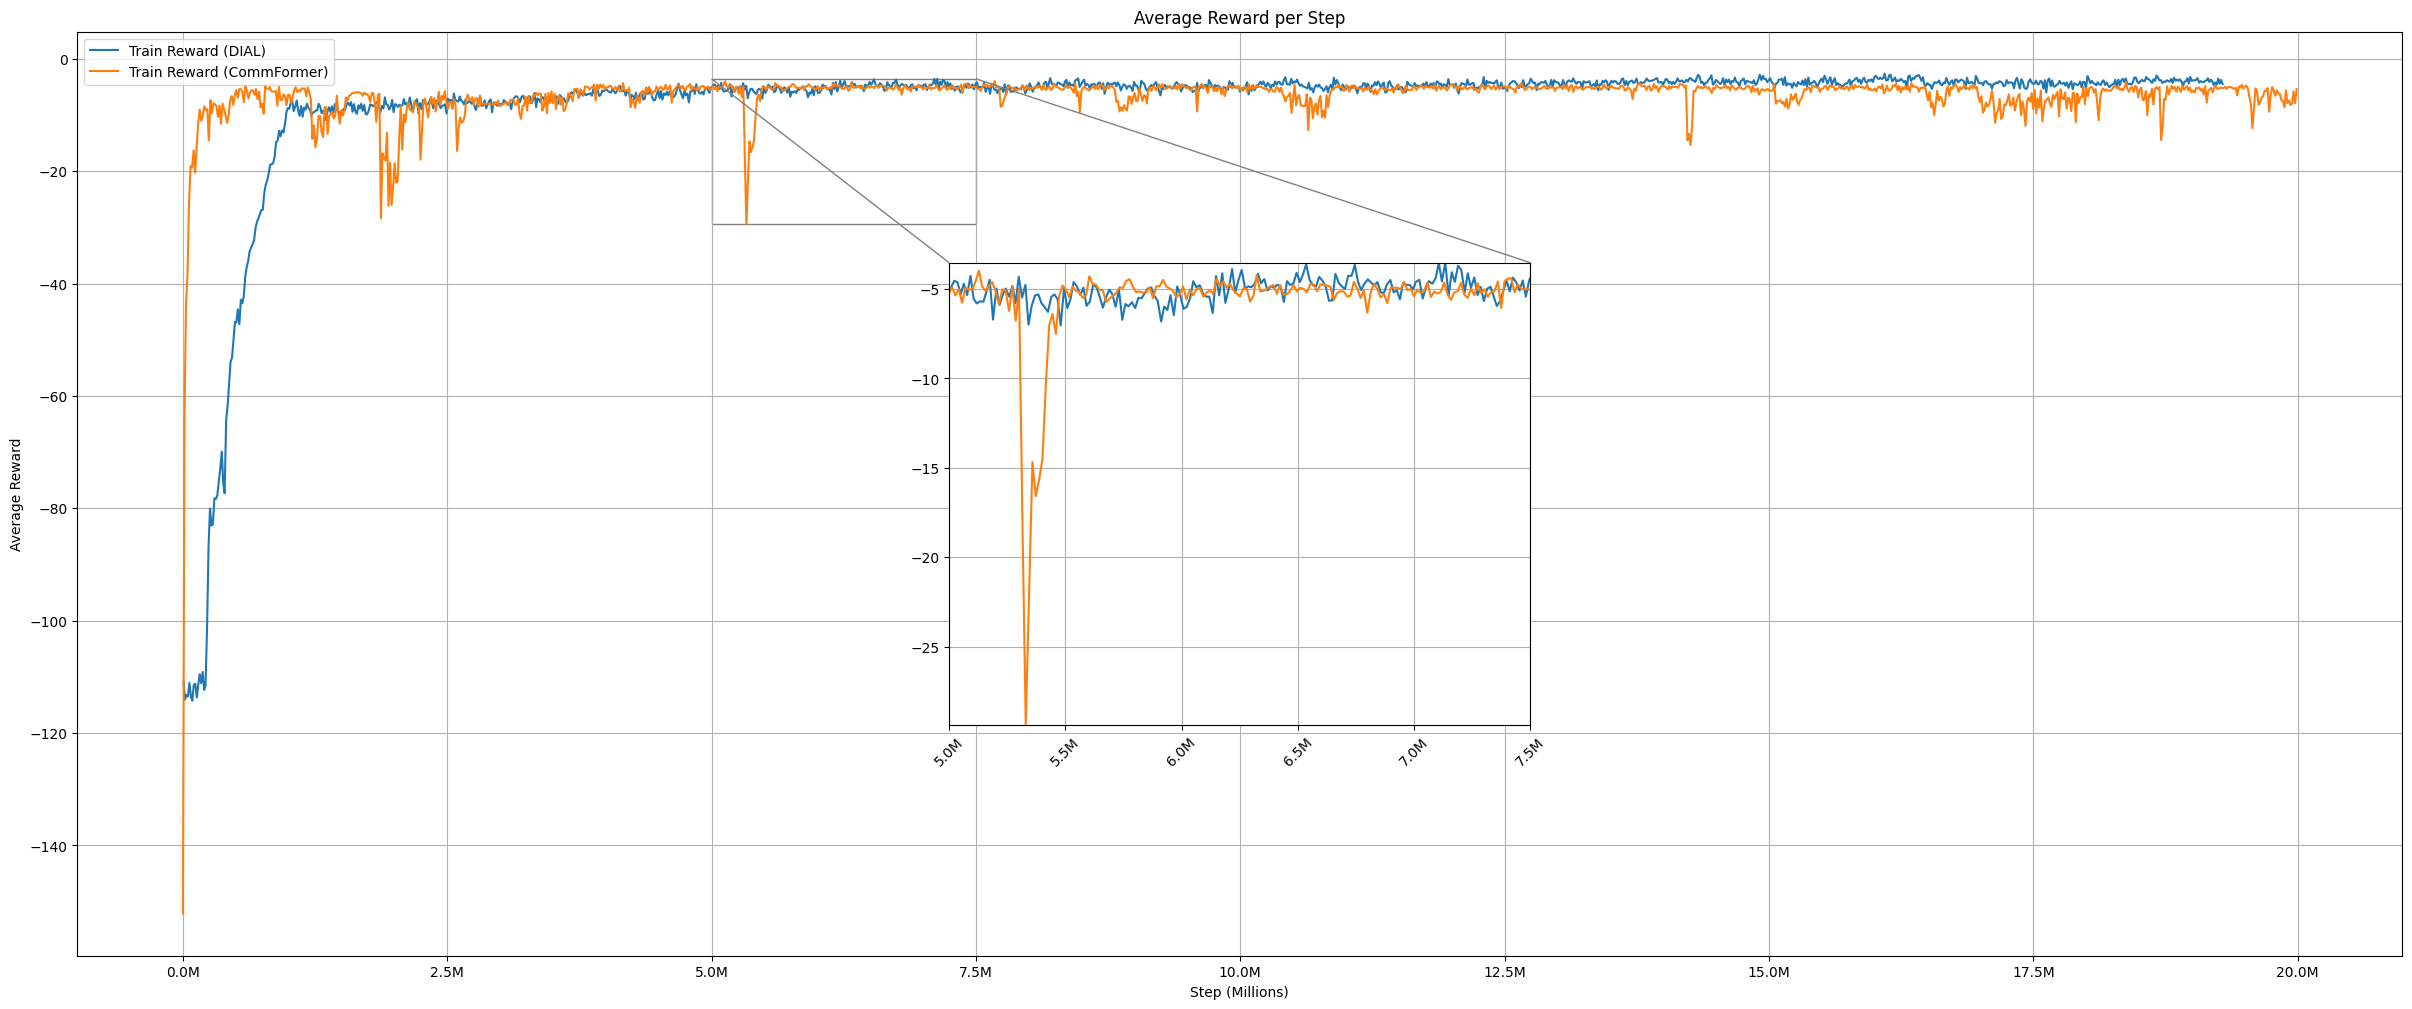

In [28]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.ticker import FuncFormatter

formatter = FuncFormatter(lambda x, _: f'{x:.1f}M')

# Plot the average mean value per step from df_avg_rewards and df_faizan_confidentiality_small
plt.figure(figsize=(30, 12))
plt.plot(df_faizan_confidentiality_small['Train_Step'].to_numpy() / 1e6, df_faizan_confidentiality_small['Train_Reward'].to_numpy(), label='Train Reward (DIAL)')
plt.plot(df_avg_rewards['Step'].to_numpy() / 1e6, df_avg_rewards['Value'].to_numpy(), label='Train Reward (CommFormer)')
plt.xlabel('Step (Millions)')
plt.ylabel('Average Reward')
plt.title('Average Reward per Step')
plt.grid(True)
plt.legend()

# Format x-axis ticks to show 'M'
plt.gca().xaxis.set_major_formatter(formatter)

# Add zoom box for data from 7.5M to 10M steps
ax = plt.gca()
axins = inset_axes(ax, width="25%", height="50%", loc='center', borderpad=2)

# Plot the same data in the inset
axins.plot(df_faizan_confidentiality_small['Train_Step'].to_numpy() / 1e6, df_faizan_confidentiality_small['Train_Reward'].to_numpy(), label='Train Reward (DIAL)')
axins.plot(df_avg_rewards['Step'].to_numpy() / 1e6, df_avg_rewards['Value'].to_numpy(), label='Train Reward (CommFormer)')

# Set xlim and ylim for the zoomed region
x1, x2 = 5, 7.5
axins.set_xlim(x1, x2)

# Calculate min/max y in the zoomed region for both datasets
y1 = min(
    df_faizan_confidentiality_small[(df_faizan_confidentiality_small['Train_Step'] >= x1 * 1e6) & (df_faizan_confidentiality_small['Train_Step'] <= x2 * 1e6)]['Train_Reward'].min(),
    df_avg_rewards[(df_avg_rewards['Step'] >= x1 * 1e6) & (df_avg_rewards['Step'] <= x2 * 1e6)]['Value'].min()
)
y2 = max(
    df_faizan_confidentiality_small[(df_faizan_confidentiality_small['Train_Step'] >= x1 * 1e6) & (df_faizan_confidentiality_small['Train_Step'] <= x2 * 1e6)]['Train_Reward'].max(),
    df_avg_rewards[(df_avg_rewards['Step'] >= x1 * 1e6) & (df_avg_rewards['Step'] <= x2 * 1e6)]['Value'].max()
)
axins.set_ylim(y1, y2)

axins.xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)
plt.grid(True)

# Draw lines indicating the area of the zoom
mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.5")

plt.show()

In [46]:
mean_reward = []
std_error_reward = []

mean_reward.append(df_avg_rewards['Value'].mean())
std_error_reward.append(df_avg_rewards['Value'].std() / (len(df_avg_rewards) ** 0.5))

mean_reward.append(df_eval_avg_rewards['Value'].mean())
std_error_reward.append(df_eval_avg_rewards['Value'].std() / (len(df_eval_avg_rewards) ** 0.5))

faizan_mean_reward = []
faizan_std_error_reward = []

faizan_mean_reward.append(df_faizan_confidentiality_small['Train_Reward'].mean())
faizan_std_error_reward.append(df_faizan_confidentiality_small['Train_Reward'].std() / (len(df_faizan_confidentiality_small) ** 0.5))

faizan_mean_reward.append(-8.2)
faizan_std_error_reward.append(1.5)

print("Mean Rewards:", mean_reward)
print("Standard Error of Rewards:", std_error_reward)

print("Faizan Mean Rewards:", faizan_mean_reward)
print("Faizan Standard Error of Rewards:", faizan_std_error_reward)

Mean Rewards: [-6.542924826397494, -6.269438325428143]
Standard Error of Rewards: [0.13728200059349793, 0.1655468413185965]
Faizan Mean Rewards: [-7.895962976807371, -8.2]
Faizan Standard Error of Rewards: [0.38608524011369844, 1.5]


In [47]:
std_reward = []

std_reward.append(df_avg_rewards['Value'].std())
std_reward.append(df_eval_avg_rewards['Value'].std())

faizan_std_reward = []

faizan_std_reward.append(df_faizan_confidentiality_small['Train_Reward'].std())
faizan_std_reward.append(1.5)

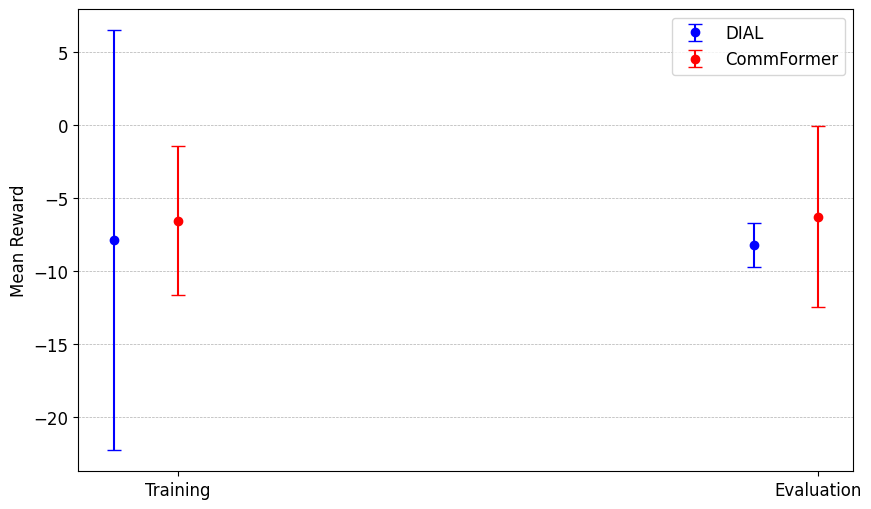

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data

scenarios = ['Training', 'Evaluation']

# Position of the bars on the x-axis
x_pos = np.arange(len(scenarios))

# Size of the figure
plt.figure(figsize=(10, 6))

# Plotting the bars for dial
plt.errorbar(x_pos - 0.1, faizan_mean_reward, yerr=faizan_std_reward, fmt='o', capsize=5, label='DIAL', color='blue')

# Plotting the bars for CommFormer
plt.errorbar(x_pos, mean_reward, yerr=std_reward, fmt='o', capsize=5, label='CommFormer', color='red')


# Adding labels and title
plt.ylabel('Mean Reward', fontsize=12)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
#plt.title('Evaluation Scores with Standard Deviation for Phase 1')
plt.xticks(x_pos, scenarios, fontsize=12)  # Set labels manually
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.show()


In [40]:
# Load the CSV file
csv_path = r"C:\Users\Alex\Downloads\heterogeneous_average_episode_rewards.csv"
df_heterogeneous_avg_rewards = pd.read_csv(csv_path)

df_heterogeneous_avg_rewards.drop(columns=['Wall time'], inplace=True)

# Display the last few rows to verify
print(df_heterogeneous_avg_rewards.tail())

        Step     Value
343  4940640 -6.793750
344  4955040 -5.791666
345  4969440 -7.320833
346  4983840 -5.843750
347  4998240 -5.843750


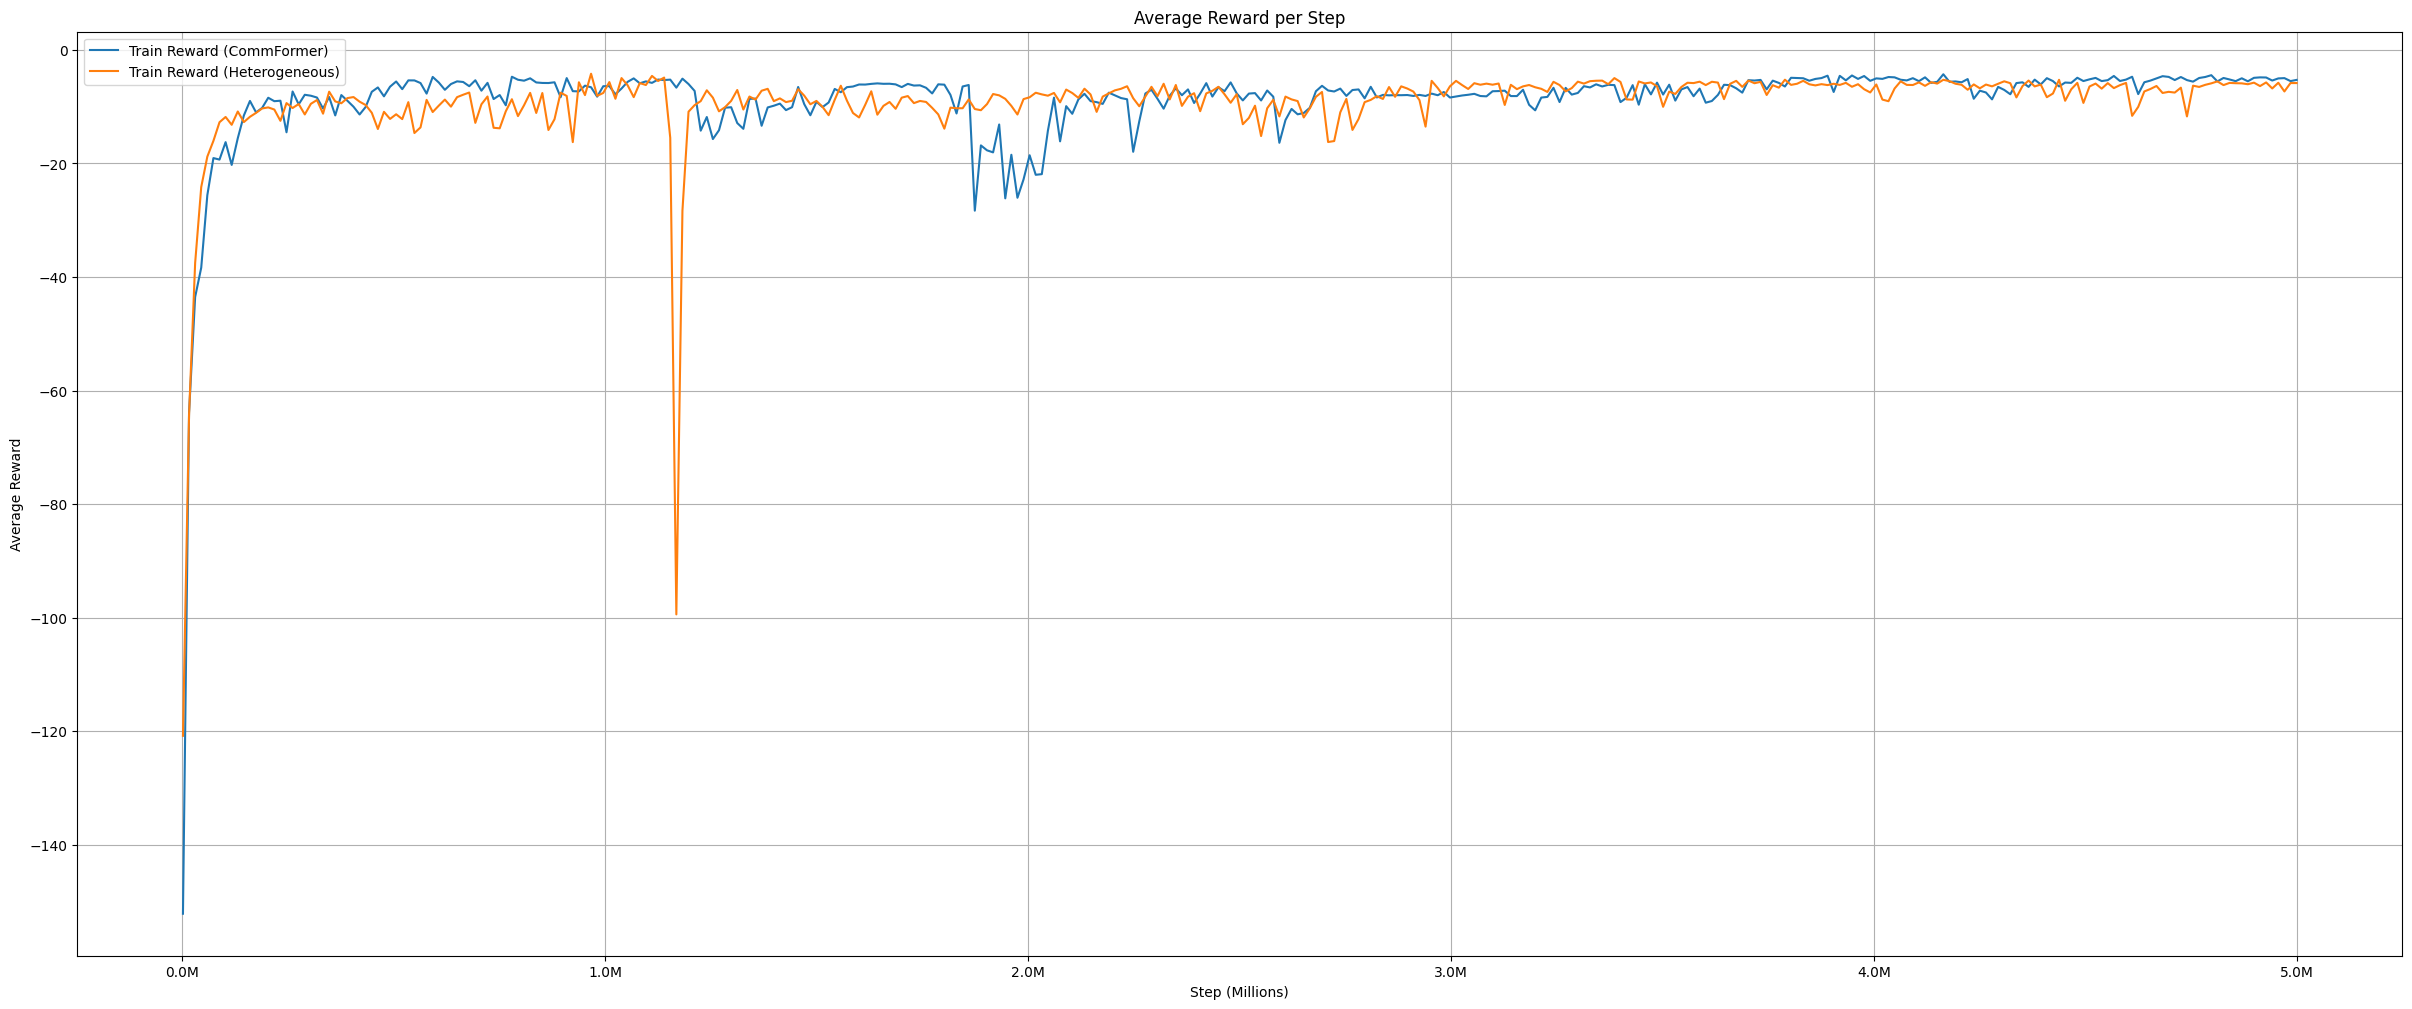

In [42]:
# Plot the average mean value per step from df_avg_rewards and df_faizan_confidentiality_small
plt.figure(figsize=(30, 12))
# Filter df_avg_rewards to only include steps up to 5M
df_avg_rewards_5M = df_avg_rewards[df_avg_rewards['Step'] <= 5e6]
plt.plot(df_avg_rewards_5M['Step'].to_numpy() / 1e6, df_avg_rewards_5M['Value'].to_numpy(), label='Train Reward (CommFormer)')
plt.plot(df_heterogeneous_avg_rewards['Step'].to_numpy() / 1e6, df_heterogeneous_avg_rewards['Value'].to_numpy(), label='Train Reward (Heterogeneous)')
plt.xlabel('Step (Millions)')
plt.ylabel('Average Reward')
plt.title('Average Reward per Step')
plt.grid(True)
plt.legend()

# Format x-axis ticks to show 'M'
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

In [55]:
heterogeneous_std_reward = []
heterogeneous_mean_reward = []

heterogeneous_std_reward.append(df_heterogeneous_avg_rewards['Value'].std())
heterogeneous_mean_reward.append(df_heterogeneous_avg_rewards['Value'].mean())

print("Updated Mean Rewards:", mean_reward)
print("Updated Standard Error of Rewards:", std_reward)

Updated Mean Rewards: [-6.542924826397494, -6.269438325428143]
Updated Standard Error of Rewards: [5.116402734067945, 6.169813288537521]


In [56]:
# Load the CSV file
csv_path = r"C:\Users\Alex\Downloads\heterogeneous_eval_average_episode_rewards.csv"
df_heterogeneous_eval_avg_rewards = pd.read_csv(csv_path)

df_heterogeneous_eval_avg_rewards.drop(columns=['Wall time'], inplace=True)

In [ ]:
heterogeneous_std_reward.append(df_heterogeneous_eval_avg_rewards['Value'].std())
heterogeneous_mean_reward.append(df_heterogeneous_eval_avg_rewards['Value'].mean())


Updated Mean Rewards: [-6.542924826397494, -6.269438325428143]
Updated Standard Error of Rewards: [5.116402734067945, 6.169813288537521]


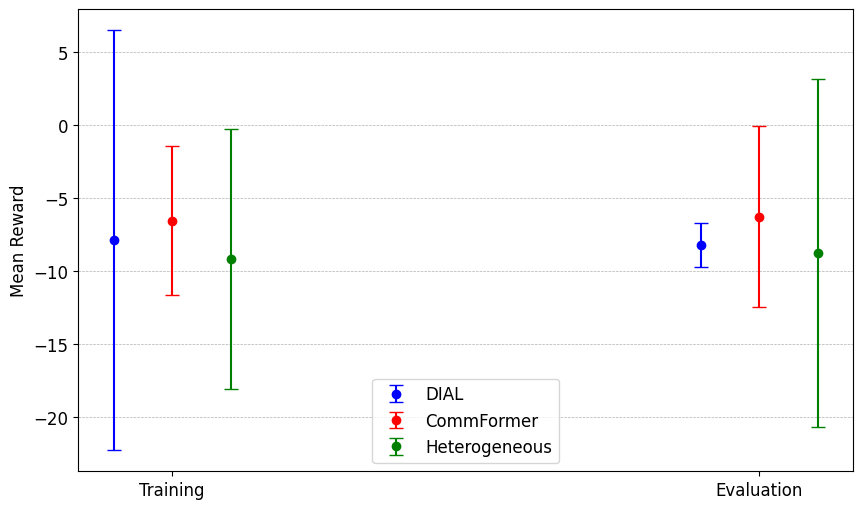

In [58]:
# Define the data

scenarios = ['Training', 'Evaluation']

# Position of the bars on the x-axis
x_pos = np.arange(len(scenarios))

# Size of the figure
plt.figure(figsize=(10, 6))

# Plotting the bars for dial
plt.errorbar(x_pos - 0.1, faizan_mean_reward, yerr=faizan_std_reward, fmt='o', capsize=5, label='DIAL', color='blue')

# Plotting the bars for CommFormer
plt.errorbar(x_pos, mean_reward, yerr=std_reward, fmt='o', capsize=5, label='CommFormer', color='red')

# Plotting the bars for Heterogeneous
plt.errorbar(x_pos + 0.1, heterogeneous_mean_reward, yerr=heterogeneous_std_reward, fmt='o', capsize=5, label='Heterogeneous', color='green')

# Adding labels and title
plt.ylabel('Mean Reward', fontsize=12)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
#plt.title('Evaluation Scores with Standard Deviation for Phase 1')
plt.xticks(x_pos, scenarios, fontsize=12)  # Set labels manually
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.show()


In [59]:
print("heterogeneous_mean_reward:", heterogeneous_mean_reward)
print("heterogeneous_std_reward:", heterogeneous_std_reward)

heterogeneous_mean_reward: [-9.177466434993963, -8.742816126894677]
heterogeneous_std_reward: [8.890181311558347, 11.92825050363518]
